# PS06: logit and prediction
## Name: Kaylee Cho
## Date: 2023/05/17

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### Who will win the election?
1.1 - (1)

In [235]:
election = pd.read_csv("./Data/us-elections_2000-2020 (5).csv", sep="\t")
election.head(10)

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,BIRTHS2020,DEATHS2020,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
3,1001,2004,Alabama,AL,Autauga,President,George W. Bush,republican,15196.0,20081,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
4,1001,2008,Alabama,AL,Autauga,President,Barack Obama,democrat,6093.0,23641,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
5,1001,2008,Alabama,AL,Autauga,President,John McCain,republican,17403.0,23641,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
6,1001,2012,Alabama,AL,Autauga,President,Barack Obama,democrat,6363.0,23932,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
7,1001,2012,Alabama,AL,Autauga,President,Mitt Romney,republican,17379.0,23932,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
8,1001,2016,Alabama,AL,Autauga,President,Hillary Clinton,democrat,5936.0,24973,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south
9,1001,2016,Alabama,AL,Autauga,President,Donald Trump,republican,18172.0,24973,...,31469,54571,42855,9643,474,1310,7085,143.0,168.0,south


1.2 - (1)

In [236]:
election_6264 = election.loc[6264:6271]
election_6264 = election_6264[["FIPS","year", "county", "income"]]
election_6264

,FIPS,year,county,income
6264,15007,2016,Kauai,44958.0
6265,15007,2016,Kauai,44958.0
6266,15007,2020,Kauai County,NaN
6267,15007,2020,Kauai County,NaN
6268,15009,2000,Maui,NaN
6269,15009,2000,Maui,NaN
6270,15009,2004,Maui,NaN
6271,15009,2004,Maui,NaN


1.2 - (2) - (a) which values do you expect to see instead of NaN in lines 6266 to 6269?

In [237]:
election_6264.loc[6266:6269]

,FIPS,year,county,income
6266,15007,2020,Kauai County,NaN
6267,15007,2020,Kauai County,NaN
6268,15009,2000,Maui,NaN
6269,15009,2000,Maui,NaN


1.2 - (2) - (b) How is it related to the non-missing income, country and fips values?

From line 6266 to 6269 there is no income value. We can see that same county has same FIPS number.

1.2 - (2) - (c) What method would you use to fill in the missings (what computer code and variables)?

In [238]:
election_6264 = election_6264.sort_values(by=['FIPS'])
election_6264.ffill(axis=0)

,FIPS,year,county,income
6264,15007,2016,Kauai,44958.0
6265,15007,2016,Kauai,44958.0
6266,15007,2020,Kauai County,44958.0
6267,15007,2020,Kauai County,44958.0
6268,15009,2000,Maui,44958.0
6269,15009,2000,Maui,44958.0
6270,15009,2004,Maui,44958.0
6271,15009,2004,Maui,44958.0


(3) Fill the missings in all columns you need (not only in income) with the most recent values that exist in the data. Ensure you do not fill missings with values from other countries.

In [239]:
election["fips2"] = election["FIPS"]
election = election.groupby(by=['fips2', 'county'], sort=False).apply(lambda x: x.ffill().bfill())
election.isna().sum()

FIPS                 0
year                 0
state                0
state2               0
county               0
office               0
candidate            0
party                0
candidatevotes       0
totalvotes           0
income            6756
population        6756
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
BIRTHS2020          20
DEATHS2020          20
region               0
fips2                0
dtype: int64

(4) print out the same lines you did above in 1.1. Does it look what you expected? Pay close attention to the relationship btw the FIPS code and the countries.

In [241]:
election.tail(10)

FIPS  year    state state2         county  \
fips2 county                                                            
56045 Weston        37380  56045  2004  Wyoming     WY         Weston   
                    37381  56045  2004  Wyoming     WY         Weston   
                    37382  56045  2008  Wyoming     WY         Weston   
                    37383  56045  2008  Wyoming     WY         Weston   
                    37384  56045  2012  Wyoming     WY         Weston   
                    37385  56045  2012  Wyoming     WY         Weston   
                    37386  56045  2016  Wyoming     WY         Weston   
                    37387  56045  2016  Wyoming     WY         Weston   
      Weston County 37388  56045  2020  Wyoming     WY  Weston County   
                    37389  56045  2020  Wyoming     WY  Weston County   

                              office        candidate       party  \
fips2 county                                                        
56045 Weston        37380  President       John Kerry    democrat   
                    37381  President   George W. Bush  republican   
                    37382  President     Barack Obama    democrat   
                    37383  President      John McCain  republican   
                    37384  President     Barack Obama    democrat   
                    37385  President      Mitt Romney  republican   
                    37386  President  Hillary Clinton    democrat   
                    37387  President     Donald Trump  republican   
      Weston County 37388  President     Donald Trump  republican   
                    37389  President     Joshep Biden    democrat   

                           candidatevotes  totalvotes  ...  POP010210D  \
fips2 county                                           ...               
56045 Weston        37380           580.0        3392  ...        7208   
                    37381          2739.0        3392  ...        7208   
                    37382           658.0        3414  ...        7208   
                    37383          2618.0        3414  ...        7208   
                    37384           422.0        3359  ...        7208   
                    37385          2821.0        3359  ...        7208   
                    37386           299.0        3526  ...        7208   
                    37387          3033.0        3526  ...        7208   
      Weston County 37388          3107.0        3542  ...        7208   
                    37389           360.0        3542  ...        7208   

                           POP220210D  POP250210D  POP320210D  POP400210D  \
fips2 county                                                                
56045 Weston        37380        6885          21          20         216   
                    37381        6885          21          20         216   
                    37382        6885          21          20         216   
                    37383        6885          21          20         216   
                    37384        6885          21          20         216   
                    37385        6885          21          20         216   
                    37386        6885          21          20         216   
                    37387        6885          21          20         216   
      Weston County 37388        6885          21          20         216   
                    37389        6885          21          20         216   

                           PST110209D  BIRTHS2020  DEATHS2020  region  fips2  
fips2 county                                                                  
56045 Weston        37380         365        16.0        14.0    west  56045  
                    37381         365        16.0        14.0    west  56045  
                    37382         365        16.0        14.0    west  56045  
                    37383         365        16.0        14.0    west  56045  
                    37384         

Now you can see that all the values in the variable income are filled up with values which are from the same county (usually from the former row value if there used to be a NaN value)

### 1.3 Feature engineering (22pts)

(1)

In [9]:
election_2020 = election[election['year'] == 2020].copy()
republican_2020 = election_2020[election_2020['party'] == "republican"].candidatevotes
democrat_2020 = election_2020[election_2020['party'] == "democrat"].candidatevotes
election_2020 = election_2020[election_2020['party'] == "democrat"]
election_2020['democrats_won'] = (democrat_2020.values > republican_2020.values).astype(int)
election_2020

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,BIRTHS2020,DEATHS2020,region,democrats_won
11,1001,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,...,54571,42855,9643,474,1310,7085,143.0,168.0,south,0
23,1003,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,...,182265,156153,17105,1348,7992,39463,527.0,661.0,south,0
35,1005,2020,Alabama,AL,Barbour County,President,Joshep Biden,democrat,4816.0,10518,...,27457,13180,12875,107,1387,699,64.0,109.0,south,0
47,1007,2020,Alabama,AL,Bibb County,President,Joshep Biden,democrat,1986.0,9595,...,22915,17381,5047,22,406,1698,62.0,90.0,south,0
59,1009,2020,Alabama,AL,Blount County,President,Joshep Biden,democrat,2640.0,27588,...,57322,53068,761,117,4626,7323,152.0,220.0,south,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37341,56037,2020,Wyoming,WY,Sweetwater County,President,Joshep Biden,democrat,3823.0,16603,...,43806,38748,438,336,6689,3613,112.0,116.0,west,0
37353,56039,2020,Wyoming,WY,Teton County,President,Joshep Biden,democrat,9848.0,14677,...,21294,18821,49,235,3191,2460,44.0,29.0,west,1
37365,56041,2020,Wyoming,WY,Uinta County,President,Joshep Biden,democrat,1591.0,9402,...,21118,19514,55,61,1855,1185,50.0,49.0,west,0
37377,56043,2020,Wyoming,WY,Washakie County,President,Joshep Biden,democrat,651.0,4012,...,8533,7795,22,48,1162,-380,18.0,32.0,west,0


(2) create auxiliary variables: population density (population divided by land area); and percentage of college graudates.

In [10]:
election_2020['population_density'] = election_2020['population']/election_2020['LND010200D']
election_2020['graduate_percentage'] = election_2020['EDU695209D']/election_2020['LND010200D']
election_2020.sample()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,POP250210D,POP320210D,POP400210D,PST110209D,BIRTHS2020,DEATHS2020,region,democrats_won,population_density,graduate_percentage
14559,26019,2020,Michigan,MI,Benzie County,President,Joshep Biden,democrat,5480.0,12262,...,72,45,302,1229,33.0,72.0,midwest,0,20.39691,1.31683


(3) Are countries with younger population more or less democratic? Compute (estimate) yearly birth rate and death rate. This is normally done as the number of births/deaths per 1000 people per year, please do the same!

In [11]:
birth_rate = (election['BIRTHS2020']/election['population']) * 4 * 1000
death_rate = (election['DEATHS2020']/election['population']) * 4 * 1000
election_2020['birth_rate'] = birth_rate
election_2020['death_rate'] = death_rate
election_2020.sample()

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,POP400210D,PST110209D,BIRTHS2020,DEATHS2020,region,democrats_won,population_density,graduate_percentage,birth_rate,death_rate
383,1063,2020,Alabama,AL,Greene County,President,Joshep Biden,democrat,3884.0,4775,...,69,-1148,24.0,24.0,south,1,12.852878,0.389435,11.318085,11.318085


(4) Ensure that the variables you are going to use are in a reasonable range!
Hint: There are values that do not make sense. Use min and max to check what is the range in data, and then find offending values and remove those. You may do other data cleaning tasks to fix the issues.

In [12]:
# Replace infinite updated data with nan
election_2020.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
election_2020.dropna(inplace=True)

In [13]:
print("min_income:", election_2020.income.min(), "max_income:", election_2020.income.max())
print("min_population:", election_2020.population.min(), "max_population:", election_2020.population.max())
print("min_candidatevotes:", election_2020.candidatevotes.min(), "max_candidatevotes:", election_2020.candidatevotes.max())
print("min_population_density:", election_2020.population_density.min(), "max_population_density:", election_2020.population_density.max())

min_income: 18183.0 max_income: 205843.0
min_population: 117.0 max_population: 10105708.0
min_candidatevotes: 4.0 max_candidatevotes: 3028885.0
min_population_density: 0.17285957006722316 max_population_density: 48428.87177968611


### 1.4 Model

(1) Esimate logistic regression model where you explain democrats' winning with population density, education level, income, birth rate, death rate, and census region.

In [14]:
election_2020["fips2"] = election_2020["FIPS"]
election_2020 = election_2020.groupby(by = ["fips2"], as_index=False)
election_2020 = election_2020.fillna(method = "ffill")
election_2020 = election_2020.sort_values(by = ["FIPS", "year"], ignore_index=True)
# election_2020.isna().sum()

In [15]:
m = smf.logit('democrats_won ~ population_density + income + EDU695209D + birth_rate + death_rate + region', data=election_2020).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.321846
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          democrats_won   No. Observations:                 3058
Model:                          Logit   Df Residuals:                     3049
Method:                           MLE   Df Model:                            8
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2860
Time:                        03:43:19   Log-Likelihood:                -984.21
converged:                       True   LL-Null:                       -1378.4
Covariance Type:            nonrobust   LLR p-value:                6.862e-165
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.0664      0.491     -2.172      0.030      -2.029      -0.104
region[T.northeast]     1.5514      0.216      7.182      0.000       1.128       1.975
region[T.south]         0.6459      0.160      4.046      0.000       0.333       0.959
region[T.west]          1.4045      0.184      7.614      0.000       1.043       1.766
population_density      0.0014      0.000      4.083      0.000       0.001       0.002
income              -2.232e-06   5.85e-06     -0.381      0.703   -1.37e-05    9.24e-06
EDU695209D           6.739e-05   9.83e-06      6.853      0.000    4.81e-05    8.67e-05
birth_rate             -0.0637      0.022     -2.857      0.004      -0.107      -0.020
death_rate             -0.0952      0.018     -5.204      0.000      -0.131      -0.059
=======================================================================================
"""

(2) Why do we use logistic regression here, instead of linear regression?

It's because the election dataset contains a lot of binary values such as democrats_won column and so on which is more apropriate to deal with logistic regression than linear regression which requires the outcome variable to be continuous. (binary variables are not continuous!)

(3) Interpret the results. Which results are statistically signicicant?

As you can see from the Logit Regression Results above, population_density, education level, birth/death rate, and land area are considered statistically significant because their p values are all less than 0.05. This means that the variables I've mentioned above are all influential to the result of democrats winning the election. The correlation can be predicted through the coef and e^(to the power of coefficient) will be the odds ratio that associates democrat vote result to the cateogries of population_density, education level, birth/death rate, and land area.

### 2. Model AirBnB Price

2.1 - (1)

In [16]:
bangkok = pd.read_csv("airbnb-bangkok-listings (1).csv", sep=",", usecols = ['bedrooms', 'price', 'accommodates', 'room_type'])
print(bangkok.shape)
bangkok.head()

(17040, 4)


,room_type,accommodates,bedrooms,price
0,Entire home/apt,3,1.0,"$1,845.00"
1,Private room,2,1.0,"$1,275.00"
2,Private room,2,1.0,$800.00
3,Private room,2,1.0,$800.00
4,Private room,2,1.0,"$1,845.00"


2 - (a)

In [17]:
bangkok['price'] = bangkok['price'].replace('[\$,]', '', regex=True).astype(float)
bangkok['price']

0        1845.0
1        1275.0
2         800.0
3         800.0
4        1845.0
          ...  
17035     664.0
17036     960.0
17037    3500.0
17038    1360.0
17039    1280.0
Name: price, Length: 17040, dtype: float64

2-(b)

In [18]:
bangkok_bedrooms_min = bangkok['bedrooms'].min()
bangkok_bedrooms_max = bangkok['bedrooms'].max()
bangkok_price_min = bangkok['price'].min()
bangkok_price_max = bangkok['price'].max()
# print(bangkok_bedrooms_min, bangkok_bedrooms_max, bangkok_price_min, bangkok_price_max)

In [19]:
bangkok = bangkok.dropna()
bangkok.isna().sum()

room_type       0
accommodates    0
bedrooms        0
price           0
dtype: int64

(3) Analyze the distribution of price. Does it look like normal? Does it look like something else? Does it suggest you should do a log-transformation?

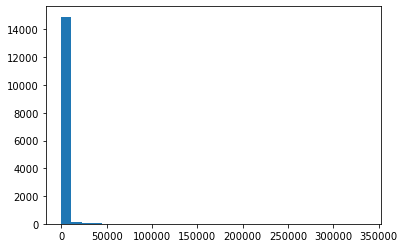

In [20]:
# before log transformation
from matplotlib import pyplot as plt
x = bangkok['price']
_ = plt.hist(x, bins = 30)

The price distribution is not normal, it has a long thin tail of low price air bnbs reaching up to the price of $16,000. Therefore, we do need to use log-transformation!

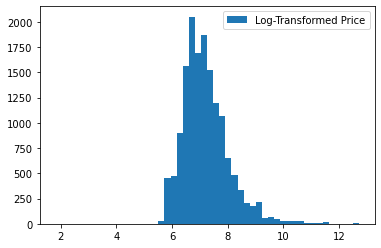

In [21]:
# Apply log transformation to the data
log_price = np.log(bangkok['price'])
# Plot the original data and the log-transformed data
plt.hist(log_price, bins=50, label='Log-Transformed Price')
plt.legend()
plt.show()

(4) Convert the number of bedrooms into another variable with a limited number of categories only, such as 1, 2, 3, 4+, and use these categories in the models below.
Hint: consult python notes section on cleaning data.

In [22]:
pd.to_numeric(bangkok['bedrooms'], downcast='float')
bangkok['bedrooms'] = pd.cut(bangkok.bedrooms,
                             bins = [1, 2, 3, 4, np.inf],
                             labels = ["1", "2", "3", "4 or more"],
                             right=False)
bangkok.bedrooms.value_counts()
bangkok.bedrooms.sample(10)

1112     1
2803     1
5635     1
3589     1
6030     1
11861    1
4460     2
4791     1
1751     3
983      2
Name: bedrooms, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4 or more']

### 2.2 Model (23pts)

(1) Run a linear regression where you explain the listing price with number of bedrooms where bedrooms uses these categories. Interpret the results, including R^2.

In [23]:
m = smf.ols(formula='price ~ bedrooms', data=bangkok).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     186.5
Date:                Mon, 22 May 2023   Prob (F-statistic):          9.32e-119
Time:                        03:43:21   Log-Likelihood:            -1.5589e+05
No. Observations:               15200   AIC:                         3.118e+05
Df Residuals:                   15196   BIC:                         3.118e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1742.2689     63.041     27.637      0.000    1618.701    1865.836
bedrooms[T.2]          1481.0031    158.427      9.348      0.000    1170.466    1791.540
bedrooms[T.3]          3317.3668    292.214     11.353      0.000    2744.591    3890.142
bedrooms[T.4 or more]  6592.1869    329.856     19.985      0.000    5945.629    7238.745
==============================================================================
Omnibus:                    36718.532   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        557010065.623
Skew:                          25.064   Prob(JB):                         0.00
Kurtosis:                     939.470   Cond. No.                         6.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The reference category is airbnb with one bedrooms and the R^2 value is 0.036 which is fairly small. From the R squared value, we can notice that the model itself is weak in terms of getting fitted to the data since we say a model fits the data well when the R squared value is above 0.75. However, the p values for each variables are all 0 and statistically significant. Moreover, the price of the airbnb tends to be more expensive in the order of 4 or more bedrooms, three bedrooms, one bedroom, and two bedrooms referring to the coef values.

(2) Now repeat the process with the model where you analyze log price instead of price. Interpret the results. Which model behaves better in the sense of R^2?

In [24]:
log_price = np.log(bangkok['price'])
m = smf.ols(formula='log_price ~ bedrooms', data=bangkok).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     1293.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        03:43:21   Log-Likelihood:                -16912.
No. Observations:               15200   AIC:                         3.383e+04
Df Residuals:                   15196   BIC:                         3.386e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.0150      0.007   1040.367      0.000       7.002       7.028
bedrooms[T.2]             0.6781      0.017     40.014      0.000       0.645       0.711
bedrooms[T.3]             1.1249      0.031     35.989      0.000       1.064       1.186
bedrooms[T.4 or more]     1.3712      0.035     38.865      0.000       1.302       1.440
==============================================================================
Omnibus:                     3643.283   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16193.066
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       7.545   Cond. No.                         6.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the R^2 value when using log_price is 0.203 which is higher than the previous model R squared value 0.036, we can say that the model using log_price better fits the data itself. Similarly, all the categories on the table have a large t value and small p value(smaller than 0.05) so we reject the null hypothesis and accept the alternative hypothesis saying that all the values are statistically significant. That being said, for one bedroom airbnb the price tends to be 7.0150 more expensive and for two bedroom it's 0.6781 more expensive for three bedroom it's 1.1249 more expensive and for four or more bedroom it's 1.3712 more expensive.

(3)

In [25]:
bangkok['accommodates'] = pd.cut(bangkok.accommodates,
                             bins = [1, 2, 3, 4, np.inf],
                             labels = ["1", "2", "3", "4 or more"],
                             right=False)
bangkok.bedrooms.value_counts()
bangkok.bedrooms.sample(10)

16660    4 or more
15598            1
16935            1
7719             2
16076            1
3076             1
16737            1
11932            1
67               3
11258            1
Name: bedrooms, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4 or more']

In [26]:
log_price = np.log(bangkok['price'])
m = smf.ols(formula='log_price ~ bedrooms + accommodates + room_type', data=bangkok).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     539.9
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        03:43:21   Log-Likelihood:                -16531.
No. Observations:               15200   AIC:                         3.308e+04
Df Residuals:                   15190   BIC:                         3.316e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.9007      0.032    215.886      0.000       6.838       6.963
bedrooms[T.2]                 0.5087      0.021     24.406      0.000       0.468       0.550
bedrooms[T.3]                 0.9379      0.034     27.713      0.000       0.872       1.004
bedrooms[T.4 or more]         1.2097      0.037     32.816      0.000       1.137       1.282
accommodates[T.2]             0.1417      0.032      4.466      0.000       0.080       0.204
accommodates[T.3]             0.2048      0.035      5.904      0.000       0.137       0.273
accommodates[T.4 or more]     0.3136      0.033      9.455      0.000       0.249       0.379
room_type[T.Hotel room]       0.1332      0.028      4.827      0.000       0.079       0.187
room_type[T.Private room]    -0.0583      0.013     -4.528      0.000      -0.084      -0.033
room_type[T.Shared room]     -0.6869      0.033    -20.786      0.000      -0.752      -0.622
==============================================================================
Omnibus:                     4377.153   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22672.783
Skew:                           1.295   Prob(JB):                         0.00
Kurtosis:                       8.394   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the result table the intercept is an airbnb with one bedroom one accommodates and entire home/aprt category. The R squared value is 0.242 which is fairly small. This tells that the model doesn't fit the data moderately. An interesting fact I found was the t value and p value of room type private and shared. As you can see from the table, they both have a negative t value which refers that it's more likely to accept the null hypothesis in this case, but the t values for both categories are 0.000. Therefore, we can say that it's statistically significant, but I found it interesting because usually when t value is less than 0 we consider it's a bad or weak correlation with the model itself.

### 2.3 Predict

(1) Now use the model above to predict (log) price for each listing in your data.

In [27]:
bangkok['phat_log_price'] = m.predict()
bangkok['log_price'] = np.log(bangkok['price'])
bangkok.sample(10)

,room_type,accommodates,bedrooms,price,phat_log_price,log_price
5396,Entire home/apt,2,1,1000.0,7.042362,6.907755
11042,Entire home/apt,2,1,400.0,7.042362,5.991465
2699,Entire home/apt,2,1,700.0,7.042362,6.551080
291,Entire home/apt,2,1,1350.0,7.042362,7.207860
8420,Hotel room,2,1,4000.0,7.175541,8.294050
16922,Entire home/apt,4 or more,3,1007.0,8.152175,6.914731
11793,Private room,2,1,600.0,6.984033,6.396930
3217,Private room,2,1,1610.0,6.984033,7.383989
1553,Private room,4 or more,2,650.0,7.664574,6.476972
4214,Entire home/apt,2,1,1055.0,7.042362,6.961296


(2) Compute root-mean-squared-error (RMSE) of this prediction.

In [28]:
yhat = m.predict()
y = np.log(bangkok['price'])
rmse = np.sqrt(np.mean((yhat - y)**2))
rmse

0.7179466122053306

(3) Now use your model to predict the price for a 2 bedroom apartment that accommodates 4. You can either leave out the variables that are not specified from your model, or choose reasonable values for those, and explain your reasoning.

In [47]:
new_bangkok = bangkok[(bangkok['bedrooms'] == '2') & (bangkok['accommodates'] == '4 or more')]
new_bangkok = new_bangkok[['accommodates', 'bedrooms', 'log_price', 'phat_log_price']]
new_bangkok.sample(10)

,accommodates,bedrooms,log_price,phat_log_price
12048,4 or more,2,7.600902,7.722903
7091,4 or more,2,7.901007,7.722903
730,4 or more,2,8.496990,7.722903
7996,4 or more,2,7.313220,7.722903
8789,4 or more,2,7.900637,7.856082
7338,4 or more,2,8.213653,7.664574
11473,4 or more,2,6.863803,7.722903
2171,4 or more,2,8.853665,7.664574
1130,4 or more,2,7.549609,7.856082
14538,4 or more,2,8.006368,7.664574


Since I calculated log price for the first prediction model, I chose to leave phat predicted value of log price which is also more accurate than the normal price recalling the R squared rate from ols regression result from the table above. Therefore, I left accommodates, bedrooms, log_price, and phat_log_price on the table!

(4) Compute the average log price for all listings in this group (2BR apartment that accommodates 4). Compute the results with your prediction. How close did you get?

In [48]:
avg_predicted_log_price = bangkok['phat_log_price'].mean()
avg_log_price = bangkok['log_price'].mean()
print("predicted mean:", avg_predicted_log_price, "actual mean:", avg_log_price)

predicted mean: 7.1989367016183365 actual mean: 7.198936701618093


The results are realy close only the last 3 degits were different.